# Заголовок

**Упражнение: A.1 - Построение данных**

# Описание

Цель этого упражнения состоит в том, чтобы построить график рассеяния, на котором будет отображено соотношение параметров (бюджетов) и продаж

## Инструкции:
- Прочитайте данные о рекламе и просмотрите верхние строки DataFrame, чтобы получить понимание данных и столбцов

- Выберите первые 7 наблюдений и столбцов «TV» и «Sales».

- Создайте график рассеяния «ТВ» бюджет против «продаж», как в лекции.

## подсказки:

**pd.read_csv (FileName)**: ВозвращаетPandas DataFrame, содержащий данные и этикетки из данных файла.

**df.ILOC []**: возвращает подмножество данных DataFrame, который содержится в диапазоне строк, передаваемых в качестве аргумента.

**np.linspace () и numpy.arange()**: возвращают равномерно распределенные цифры на указанныеинтервал.

**df.head ()**: возвращает первые 5 рядов DataFrame с именами столбцов

**plt.scatter ()**: график рассеяния y против х с различным размером маркера и/или цветом

**plt.xlabel ()** : это используется, чтобы указатьтекст, который будет отображаться в качестве метки для оси x


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Читаем файл с данными
df = pd.read_csv('advertising.csv')


In [3]:
# посмотрю сколько наблюдений в таблице
df.shape


(200, 4)

In [4]:
# посмотрю есть ли пропущенные данные, которые могут повлиять на анализ (False - это заполненная ячейка)
df.isnull()


,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [5]:
# Если они существуют, то где они расположены (аггрегированная инфа)
df.isnull().sum() # если добавить еще один сум, получим общее количество пустых в таблицу
# окей. у меня нет пустых ячеек и все данные типа инт, то есть непрерывные, количественные

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Опишем датасет

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Plotting the graph

Базовый синтаксис: **df.plot.scatter(x = 'x_column_name', y = 'y_columnn_name')**

Text(0, 0.5, 'Sales')

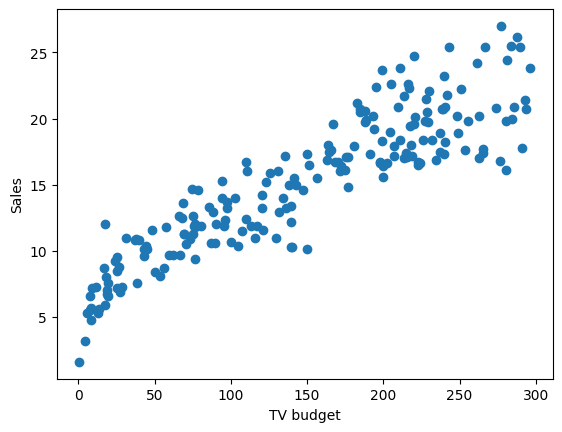

In [7]:
# или
plt.scatter(df.TV, df.Sales)

# Лейблы (x : TV budget, y : Sales)
plt.xlabel("TV budget")
plt.ylabel("Sales")

# Вариант с сиборн

<Axes: xlabel='TV', ylabel='Sales'>

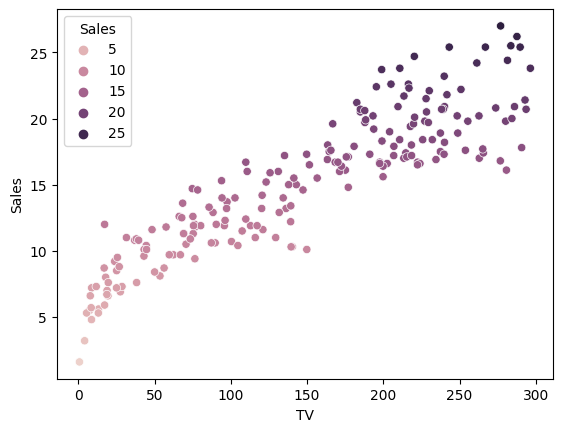

In [8]:
import seaborn as sns
# чем больше продаж тем темнее точки
sns.scatterplot(data = df, x="TV", y="Sales", hue = 'Sales')

### Сохраним в переменную первые 7 строк и посмотрим данные

In [9]:
# распечатываем нужное количество строк для оценки данных и количества столбцов
#  можно просто распечатать хедер, но мы положим данные в переменную 
# для дальнейшего использования чтобы получить 7 точек на графике
df_new = df.head(7) 
print(df_new)

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
5    8.7   48.9       75.0    7.2
6   57.5   32.8       23.5   11.8


## Оставим на графике часть данных

Text(0, 0.5, 'Sales')

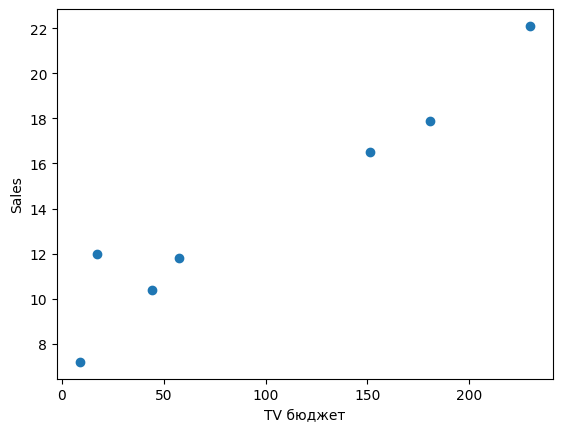

In [10]:
# создадим график, используя переменную в которую мы положили первые 7 наблюдений
# после точки поставим наименование столбца предиктора и предиката
plt.scatter(df_new.TV, df_new.Sales)

# добавим названия столбцов (x : TV budget, y : Sales)
plt.xlabel("TV бюджет")
plt.ylabel("Sales")


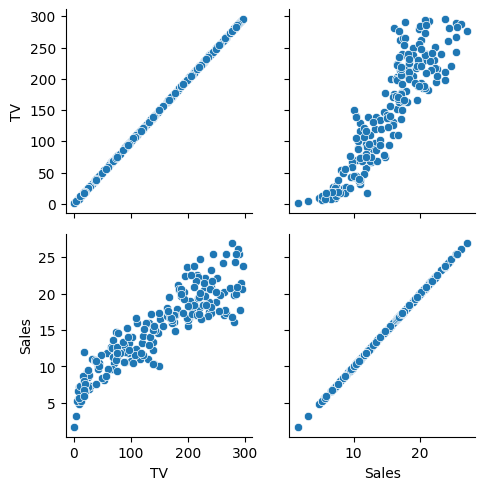

In [11]:
cols = ['TV', 'Sales']
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)
